In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

In [3]:
filename = "data/ETHUSDT_merged.csv"

data = pd.read_csv(filename)
data.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


In [4]:
variables = ["open_time","close","volume"]
data = pd.read_csv(filename,usecols=variables,index_col=["open_time"])
data.head()

,close,volume
open_time,,
2019-09-01 00:00:00,172.45,5981.16399
2019-09-01 01:00:00,172.71,7929.54701
2019-09-01 02:00:00,172.43,2650.04457
2019-09-01 03:00:00,172.57,2676.49085
2019-09-01 04:00:00,172.46,2596.85893


In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data.index

DatetimeIndex(['2019-09-01 00:00:00', '2019-09-01 01:00:00',
               '2019-09-01 02:00:00', '2019-09-01 03:00:00',
               '2019-09-01 04:00:00', '2019-09-01 05:00:00',
               '2019-09-01 06:00:00', '2019-09-01 07:00:00',
               '2019-09-01 08:00:00', '2019-09-01 09:00:00',
               ...
               '2023-05-31 14:00:00', '2023-05-31 15:00:00',
               '2023-05-31 16:00:00', '2023-05-31 17:00:00',
               '2023-05-31 18:00:00', '2023-05-31 19:00:00',
               '2023-05-31 20:00:00', '2023-05-31 21:00:00',
               '2023-05-31 22:00:00', '2023-05-31 23:00:00'],
              dtype='datetime64[ns]', name='open_time', length=32821, freq=None)

In [7]:
data.index.min(),data.index.max()

(Timestamp('2019-09-01 00:00:00'), Timestamp('2023-05-31 23:00:00'))

In [8]:
data.isnull().sum()

close     0
volume    0
dtype: int64

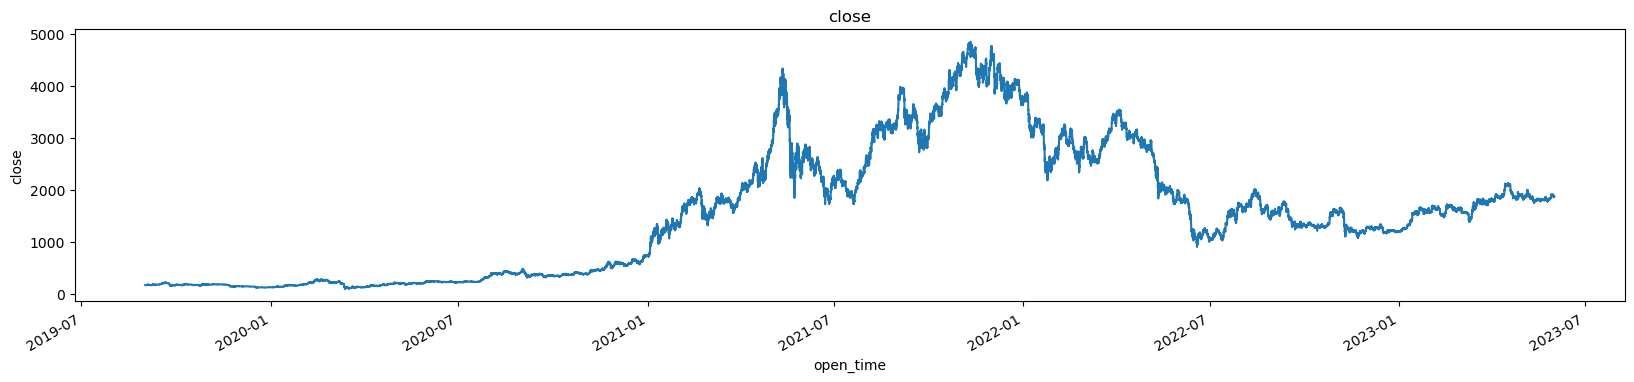

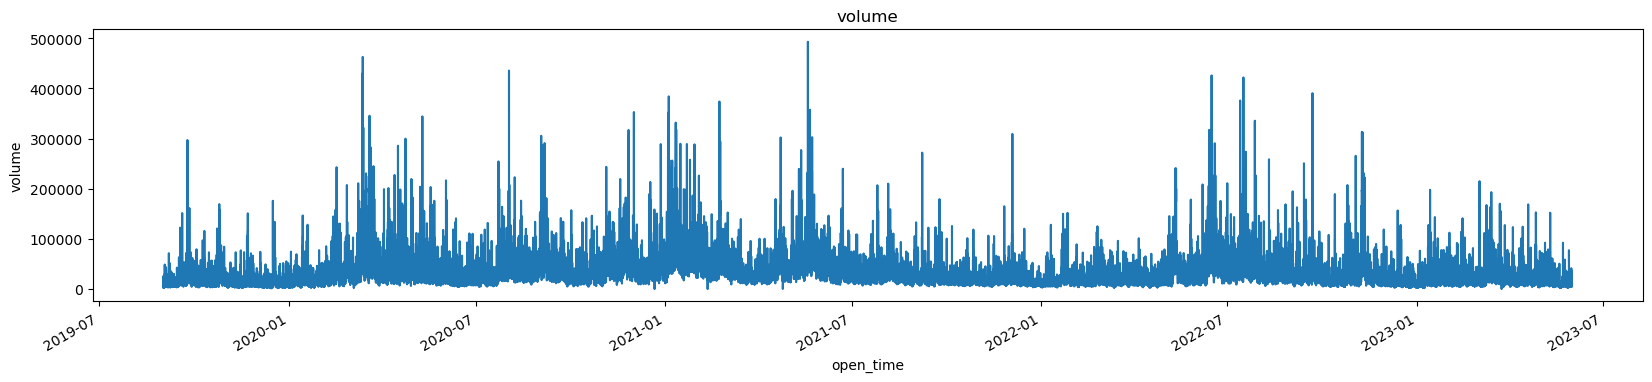

In [9]:
for var in ["close","volume"]:
    
    #Plot the time series
    data[var].plot(figsize=(20,4))
    
    plt.title(var)
    
    plt.ylabel(var)
    
    plt.show()


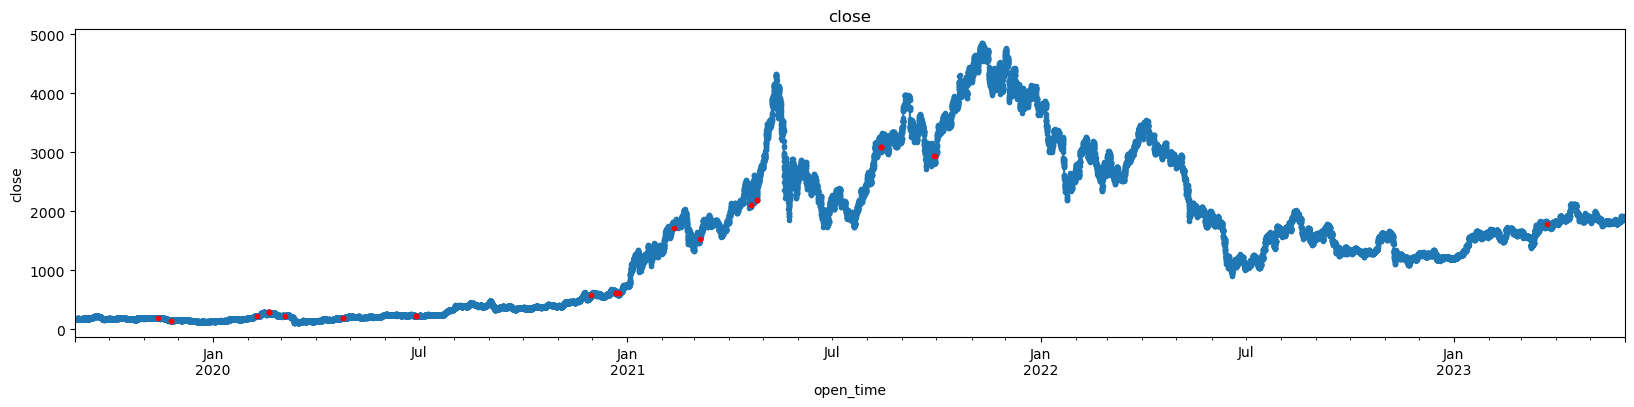

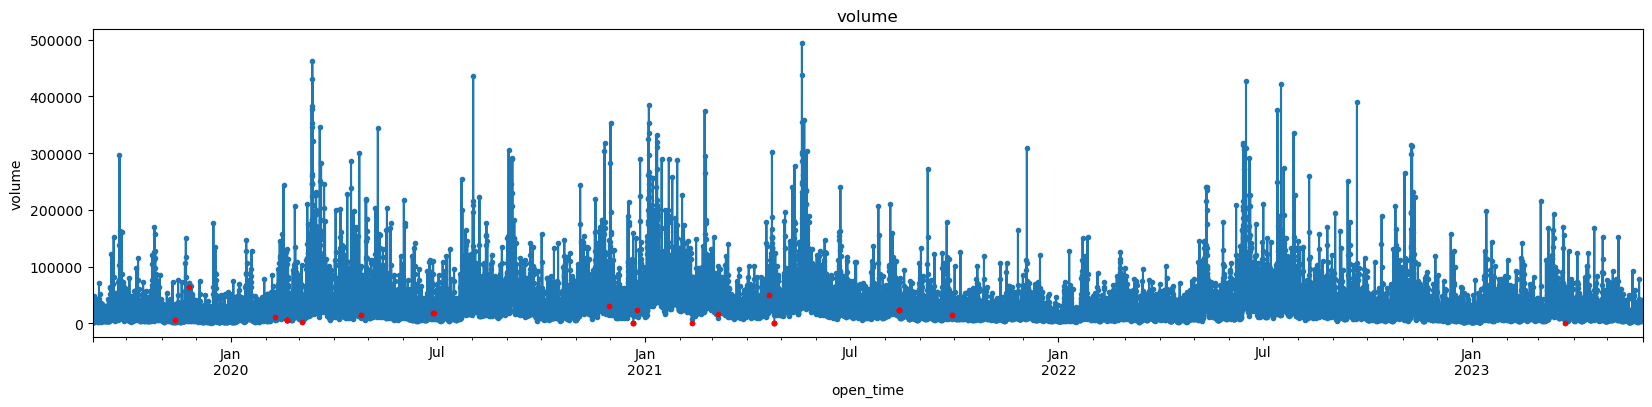

In [10]:
# Introduce the missing timestamps.
# Note that we capture this in a different dataframe.
data_ = data.asfreq("1H")

# Apply the forward fill method.
data_imputed = data_.fillna(method="ffill")

# Plot the imputed time series.
for var in ["close", "volume"]:

    # plot the time series.
    ax = data_[var].plot(linestyle="-", marker=".", figsize=[20, 4])

    # plot the imputed values on top, in red.
    data_imputed[data_.isnull()][var].plot(ax=ax, legend=None, marker=".", color="r")

    # Add title.
    plt.title(var)

    # the y axis label
    plt.ylabel(var)

    plt.show()

# Seasonality

In [11]:
# Capture "time" in a new variable.

time_ = data.index.time

time_ = pd.Series(time_, index=data.index)

time_.head()

open_time
2019-09-01 00:00:00    00:00:00
2019-09-01 01:00:00    01:00:00
2019-09-01 02:00:00    02:00:00
2019-09-01 03:00:00    03:00:00
2019-09-01 04:00:00    04:00:00
dtype: object

Text(0, 0.5, 'Price')

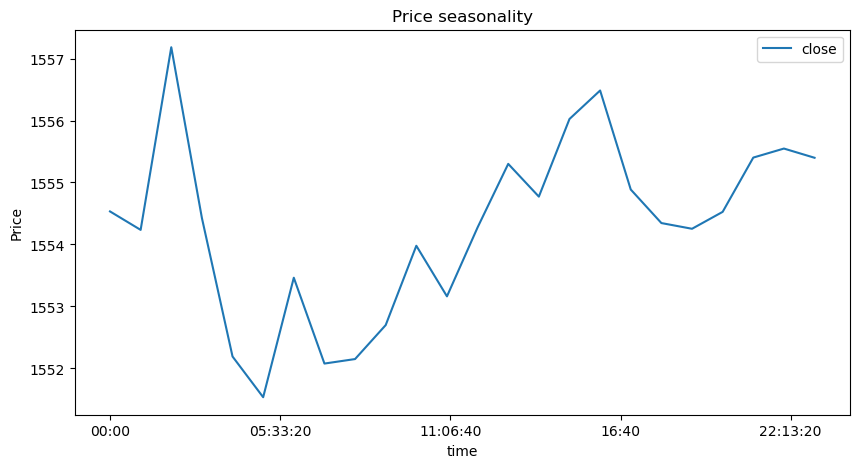

In [13]:
# Plot the average close price per hour.

data.groupby(time_)[["close"]].mean().plot(figsize=(10, 5))
plt.title("Price seasonality")
plt.ylabel("Price")

Text(0, 0.5, 'Volume')

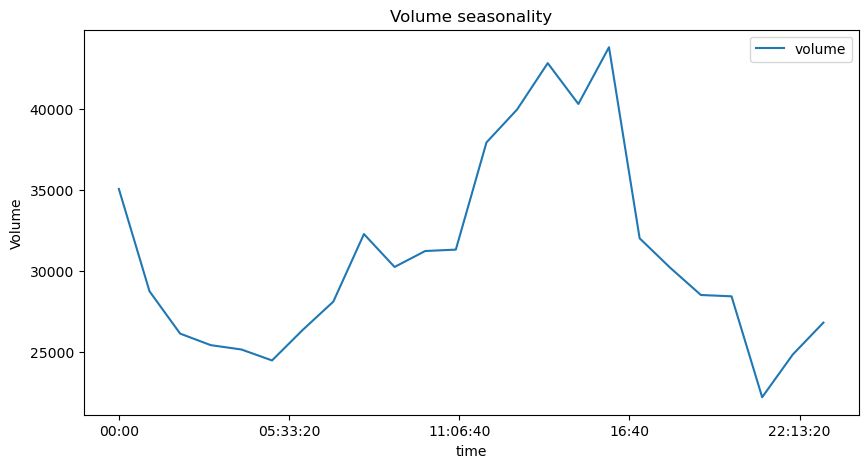

In [14]:
# Plot the average humidity per hour.

data.groupby(time_)[["volume"]].mean().plot(figsize=(10, 5))
plt.title("Volume seasonality")
plt.ylabel("Volume")